In [1]:
import pandas as pd

## QUEST 풀기용

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### 환자 대상 분석 필요

### 데이터 핸들링
- 정렬
     - df.sort_values(by=['신장', '체중'], ignore_index=True, ascending=[False ,True])
- 추출
    - 열 단위 추출 : df[['', '']] 컬럼 리스트로 한다.
- 필터 : df.loc[condition]
- 요약 : pivot_table(df_saledays_dropcol, index='', values='', aggfunc=)
    - index : group by
    - values : 대상 컬럼명
    - aggfunc : 집합 함수(from numpy)

### 환자 대상 분석 필요
0. 변수 구조 확인
1. 목표 변수 설정 : '재발여부' 정의
2. 설명 변수 설정 : [['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형']] 설명 변수

In [4]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
df_ROS_forpatient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형']]
df_ROS_forpatient.head(2)
df_ROS_forpatient.tail(2)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
1892,1,177,0,77.0,0,29,사무직,RH+A
1893,2,168,0,49.0,0,30,사무직,RH+AB


# 행단위 추출
# iloc[:, :], head(), tail()

In [6]:
df_ROS_forpatient.iloc[2:10]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
2,1,178,0,77.1,0,39,특수전문직,RH+B
3,1,174,0,74.2,0,40,주부,RH+O
4,1,183,0,80.7,0,42,특수전문직,RH+A
5,2,164,0,60.8,1,60,자영업,RH+AB
6,1,175,0,74.8,0,47,사업가,RH+O
7,1,183,0,81.2,1,55,NaN,RH+B
8,1,168,0,69.2,1,52,NaN,RH+A
9,1,160,0,63.0,0,79,NaN,RH+A


In [7]:
df_ROS_forpatient.iloc[-4:]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
1890,2,157,0,59.0,0,42,사무직,RH+B
1891,1,167,0,70.0,0,61,무직,RH+O
1892,1,177,0,77.0,0,29,사무직,RH+A
1893,2,168,0,49.0,0,30,사무직,RH+AB


### index 관련 사항

In [8]:
df_ROS_ID = df_ROS.set_index('환자ID')
df_ROS_ID

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
환자ID,,,,,,,,,,,,,,,,,,,,,
1PT,0,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
2PT,1,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
3PT,2,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
4PT,3,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
5PT,4,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890PT,1889,44.0,1,NaN,0.0,0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1891PT,1890,30.8,2,NaN,0.0,0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1892PT,1891,36.7,3,NaN,0.0,0,0,0,0,1,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [9]:
df_ROS_gender = df_ROS.set_index('성별')
df_ROS_gender

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
성별,,,,,,,,,,,,,,,,,,,,,
2,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
1,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
1,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
1,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
2,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [10]:
df_ROS_ID.loc[['3PT', '5PT']]

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
환자ID,,,,,,,,,,,,,,,,,,,,,
3PT,2,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
5PT,4,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [11]:
df_ROS_forpatient.loc[:, '성별':'연령']

,성별,신장,심혈관질환,체중,흡연여부,연령
0,2,163,0,60.3,0,66
1,1,171,0,71.7,0,47
2,1,178,0,77.1,0,39
3,1,174,0,74.2,0,40
4,1,183,0,80.7,0,42
...,...,...,...,...,...,...
1889,2,157,0,64.0,0,59
1890,2,157,0,59.0,0,42
1891,1,167,0,70.0,0,61
1892,1,177,0,77.0,0,29


### 정렬

In [12]:
df_ROS_forpatient.sort_values(by=['신장', '체중'], ignore_index=True, ascending=[False ,False])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
0,1,204,0,103.0,0,39,교사,RH+O
1,1,191,0,114.0,0,17,학생,RH+O
2,1,190,0,74.0,0,47,자영업,RH+O
3,1,189,0,85.9,0,39,자영업,RH+A
4,1,189,0,85.3,0,22,군인,RH+B
...,...,...,...,...,...,...,...,...
1889,2,143,0,56.0,0,56,무직,RH+O
1890,2,143,0,53.3,0,31,사무직,RH+O
1891,2,142,0,52.9,0,38,자영업,RH+A
1892,2,140,0,35.0,0,48,NaN,RH+A


## quest
## 정렬 : 혈액형(ascending), 직업(descending)
## 추출 : 혈액형, 직업, 성별

In [13]:
df_ROS_bl = df_ROS[['혈액형', '직업', '성별']].sort_values(by=['혈액형', '직업'],ignore_index=True ,ascending=[True, False]).iloc[0:5]
df_ROS_bl

,혈액형,직업,성별
0,RH+A,학생,1
1,RH+A,학생,1
2,RH+A,학생,2
3,RH+A,학생,2
4,RH+A,학생,1


In [14]:
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


## quest 2
- 직업군이 상위 2위에 속하는 항목 : value_counts, iloc, DataFrame
- 체중 > 70 & 신장 > 170, 흡연여부 없는 사람(0)
- 해당 레코드 갯수 표현

In [15]:
df_JOB1 = df_ROS[['직업']].value_counts().index[0][0]
df_JOB2 = df_ROS[['직업']].value_counts().index[1][0]

In [16]:
df_sun = df_ROS[['직업']].value_counts().iloc[:2]
df_sun

직업 
사무직    449
자영업    171
dtype: int64

In [17]:
df_ROS_au = df_ROS.loc[(df_ROS['직업'] == df_JOB1) | (df_ROS['직업'] == df_JOB2)]
df_ROS_au

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
5,5,6PT,28.5,3,NaN,0.0,0,0,2,0,...,0,41.8,23.6,8.8,0,-0.95,1937.5,4,Down,0
11,11,12PT,53.2,3,39.0,0.0,0,0,0,0,...,2,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0
23,23,24PT,28.5,3,NaN,0.0,0,1,0,0,...,0,41.8,20.8,10.3,1,-1.69,2205.2,4,Down,0
30,30,31PT,51.1,3,NaN,0.0,0,0,0,0,...,0,45.3,14.9,20.2,0,-1.64,1833.2,4,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1883,1884PT,25.4,3,NaN,0.0,0,1,0,0,...,0,55.2,25.1,11.5,0,NaN,2381.2,4,Down,0
1888,1888,1889PT,42.4,3,NaN,0.0,0,0,0,0,...,0,54.2,21.3,6.8,1,NaN,2421.3,3,Down,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.8,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.5,5,Down,0


In [18]:
# condition = (df_ROS_au['체중'] > 70) & (df_ROS_au['신장'] > 180) & (df_ROS_au['흡연여부'] == 0)
df_ROS_end = df_ROS_au.loc[(df_ROS_au['체중'] > 70) & (df_ROS_au['신장'] > 170) & (df_ROS_au['흡연여부'] == 0)]
df_ROS_end

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
23,23,24PT,28.5,3,NaN,0.0,0,1,0,0,...,0,41.8,20.8,10.3,1,-1.69,2205.2,4,Down,0
30,30,31PT,51.1,3,NaN,0.0,0,0,0,0,...,0,45.3,14.9,20.2,0,-1.64,1833.2,4,Middle,0
40,40,41PT,42.7,5,NaN,0.0,0,0,0,0,...,2,35.8,16.1,14.6,0,-1.98,2040.7,4,Middle,0
53,53,54PT,38.6,3,NaN,0.0,0,0,0,0,...,0,33.6,10.6,7.0,0,-1.10,2099.3,4,Middle,0
72,72,73PT,34.6,2,NaN,0.0,0,0,0,0,...,0,38.4,16.2,16.1,0,-2.34,2387.1,3,Down,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,1830,1831PT,47.9,1,NaN,0.0,0,0,0,0,...,0,56.3,19.7,26.4,0,NaN,2310.0,4,Middle,0
1841,1841,1842PT,33.1,1,NaN,0.0,0,0,0,0,...,0,39.2,14.3,9.1,0,NaN,2067.0,4,Middle,0
1855,1855,1856PT,55.6,2,NaN,0.0,0,0,0,0,...,0,58.8,15.8,18.6,0,NaN,2149.3,4,Middle,0
1871,1871,1872PT,51.1,1,NaN,0.0,0,0,0,0,...,0,42.1,7.0,24.9,0,NaN,2102.3,4,Extremely down,0


In [19]:
len(df_ROS_end) # 레코드 개수

164

## quest 3
- quest2 집합 구성하기
- 직업별 성별 빈도
- 직업별 혈액형 빈도

In [20]:
import numpy as np

In [21]:
df_ROS_end.pivot_table(index='직업', columns='성별', aggfunc='size')

성별,1,2
직업,,
사무직,121.0,4.0
자영업,39.0,NaN


In [22]:
df_ROS_end.pivot_table(index='직업', columns='혈액형', aggfunc='size')

혈액형,RH+A,RH+AB,RH+B,RH+O
직업,,,,
사무직,50,13,24,38
자영업,21,3,8,7


In [23]:
pd.pivot_table(df_ROS_end[['성별', '직업']], index=['성별'],columns='직업', aggfunc=np.size)

직업,사무직,자영업
성별,,
1,242.0,78.0
2,8.0,NaN


In [24]:
pd.pivot_table(df_ROS_end[['혈액형', '직업']], index='혈액형',columns='직업', aggfunc=np.size)

직업,사무직,자영업
혈액형,,
RH+A,100,42
RH+AB,26,6
RH+B,48,16
RH+O,76,14


### quest4
- DDA 분석 대상 : 성별	신장	심혈관질환	체중	흡연여부	연령	직업	혈액형
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 데이터 셋 만들기

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [26]:
df_ROS_forpatient

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
0,2,163,0,60.3,0,66,자영업,RH+A
1,1,171,0,71.7,0,47,운동선수,RH+A
2,1,178,0,77.1,0,39,특수전문직,RH+B
3,1,174,0,74.2,0,40,주부,RH+O
4,1,183,0,80.7,0,42,특수전문직,RH+A
...,...,...,...,...,...,...,...,...
1889,2,157,0,64.0,0,59,무직,RH+A
1890,2,157,0,59.0,0,42,사무직,RH+B
1891,1,167,0,70.0,0,61,무직,RH+O
1892,1,177,0,77.0,0,29,사무직,RH+A


In [27]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 118.5+ KB


In [28]:
df_ROS_forpatient.describe()

,성별,신장,심혈관질환,체중,흡연여부,연령
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000


In [29]:
df_ROS_forpatient.describe(include=object)

,직업,혈액형
count,1479,1894
unique,17,4
top,사무직,RH+A
freq,449,688


<Axes: xlabel='성별', ylabel='count'>

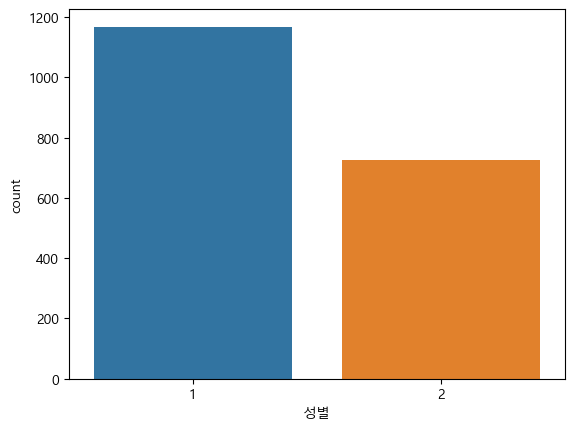

In [30]:
sns.countplot(data=df_ROS_forpatient, x='성별')

<Axes: xlabel='신장'>

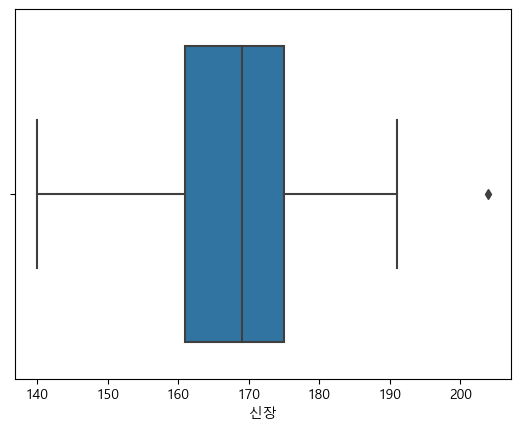

In [31]:
sns.boxplot(data=df_ROS_forpatient, x='신장')

<Axes: xlabel='심혈관질환', ylabel='count'>

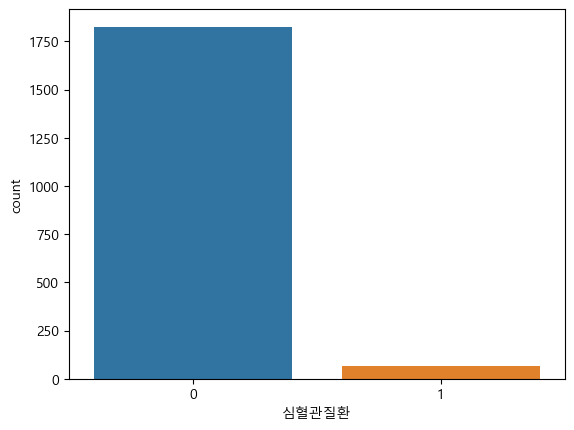

In [32]:
sns.countplot(data=df_ROS_forpatient, x='심혈관질환')

<Axes: xlabel='체중'>

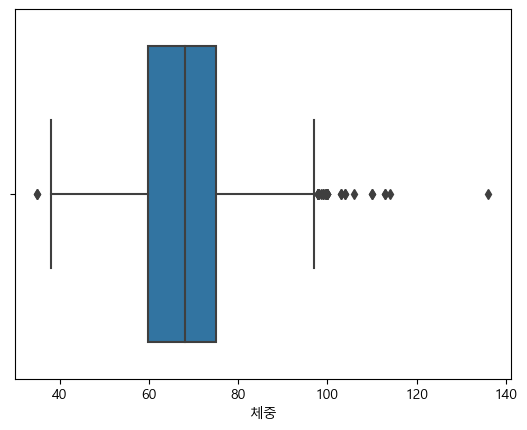

In [33]:
sns.boxplot(data=df_ROS_forpatient, x='체중')

<Axes: xlabel='흡연여부', ylabel='count'>

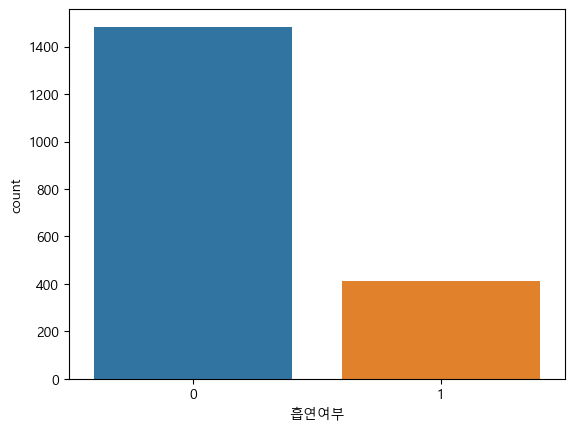

In [34]:
sns.countplot(data=df_ROS_forpatient, x='흡연여부')

<Axes: xlabel='연령'>

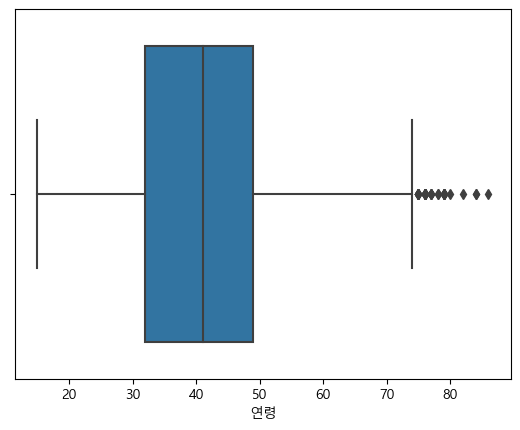

In [35]:
sns.boxplot(data=df_ROS_forpatient, x='연령')

<Axes: xlabel='직업', ylabel='count'>

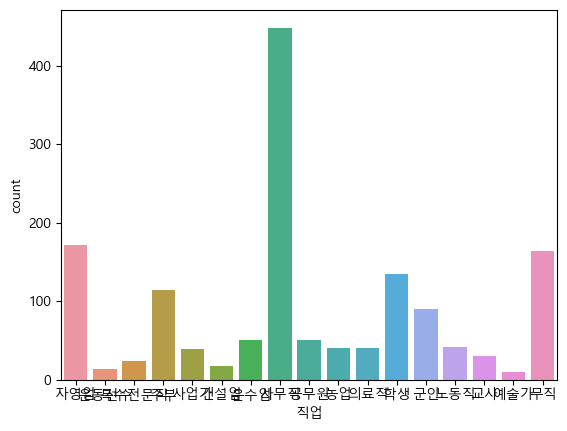

In [36]:
sns.countplot(data=df_ROS_forpatient, x='직업')

<Axes: xlabel='혈액형', ylabel='count'>

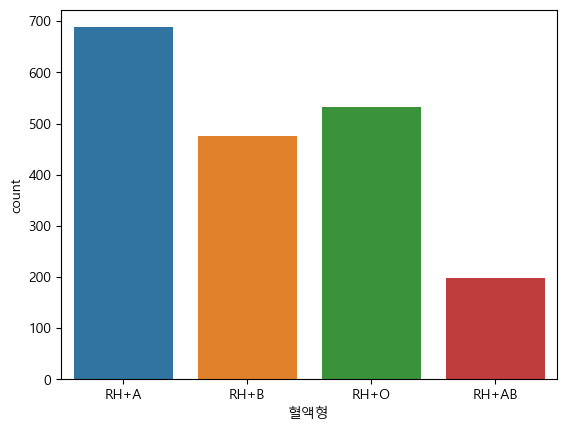

In [37]:
sns.countplot(data=df_ROS_forpatient, x='혈액형')

## 데이테 셋 만들기


In [38]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 118.5+ KB


In [39]:
df_ROS_forpatient.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
dtype: int64

In [40]:
df_ROS_forpatient_dropna = df_ROS_forpatient.dropna()
df_ROS_forpatient_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 104.0+ KB


In [41]:
Q1 = df_ROS_forpatient_dropna['신장'].describe()['25%']
Q3 = df_ROS_forpatient_dropna['신장'].describe()['75%']
IQR = Q3 - Q1

In [42]:
Q1, Q3, IQR

(161.0, 175.0, 14.0)

In [43]:
bound_up = Q3 + IQR * 1.5
bound_up

196.0

In [44]:
bound_down = Q1 - IQR * 1.5
bound_down

140.0

In [45]:
condition = (df_ROS_forpatient_dropna['신장'] <= bound_up) & (df_ROS_forpatient_dropna['신장'] >= bound_down) # 긍정 조건 변환
condition

0       True
1       True
2       True
3       True
4       True
        ... 
1889    True
1890    True
1891    True
1892    True
1893    True
Name: 신장, Length: 1479, dtype: bool

In [46]:
df_ROS_forpatient_dropna_condition = df_ROS_forpatient_dropna[condition]
df_ROS_forpatient_dropna_condition

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형
0,2,163,0,60.3,0,66,자영업,RH+A
1,1,171,0,71.7,0,47,운동선수,RH+A
2,1,178,0,77.1,0,39,특수전문직,RH+B
3,1,174,0,74.2,0,40,주부,RH+O
4,1,183,0,80.7,0,42,특수전문직,RH+A
...,...,...,...,...,...,...,...,...
1889,2,157,0,64.0,0,59,무직,RH+A
1890,2,157,0,59.0,0,42,사무직,RH+B
1891,1,167,0,70.0,0,61,무직,RH+O
1892,1,177,0,77.0,0,29,사무직,RH+A


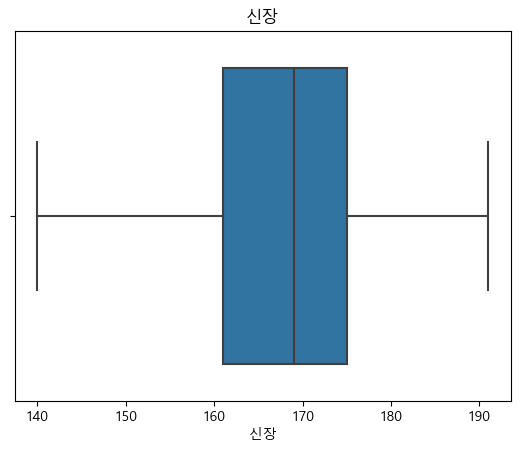

In [47]:
sns.boxplot(data=df_ROS_forpatient_dropna_condition, x='신장')
plt.title("신장")
plt.show()

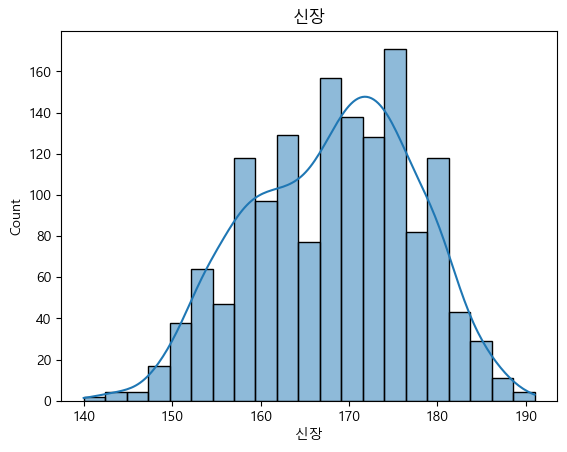

In [48]:
sns.histplot(data=df_ROS_forpatient_dropna_condition, x='신장', kde=True)
plt.title("신장")
plt.show()

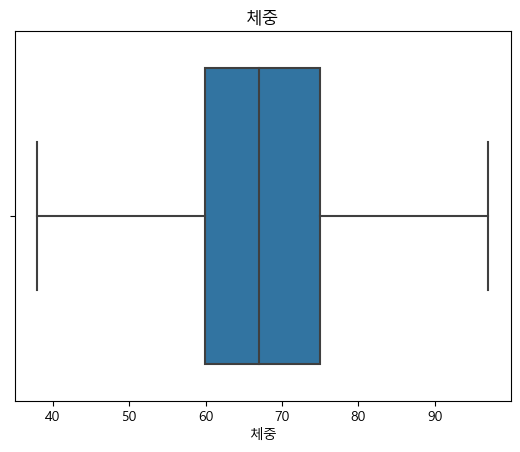

In [49]:
# 체중
Q1 = df_ROS_forpatient_dropna['체중'].describe()['25%']
Q3 = df_ROS_forpatient_dropna['체중'].describe()['75%']
IQR = Q3 - Q1
bound_up = Q3 + IQR * 1.5
bound_down = Q1 - IQR * 1.5
condition = (df_ROS_forpatient_dropna['체중'] <= bound_up) & (df_ROS_forpatient_dropna['체중'] >= bound_down)
df_ROS_forpatient_dropna_condition = df_ROS_forpatient_dropna[condition]
sns.boxplot(data=df_ROS_forpatient_dropna_condition, x='체중')
plt.title("체중")
plt.show()

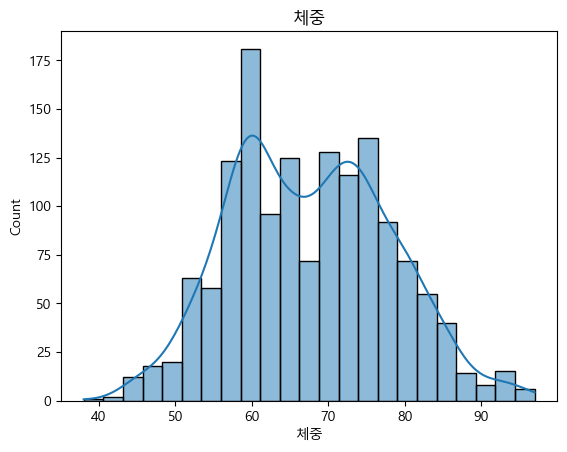

In [50]:
sns.histplot(data=df_ROS_forpatient_dropna_condition, x='체중', kde=True)
plt.title("체중")
plt.show()

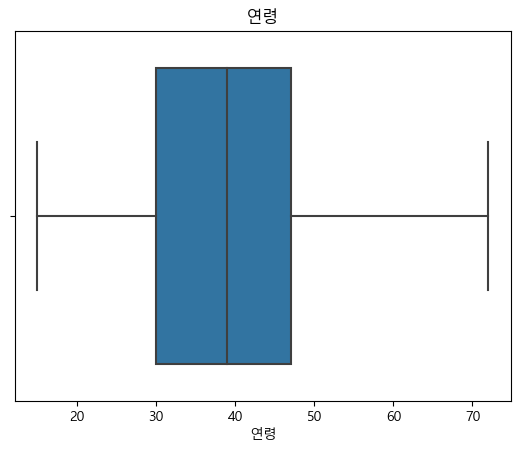

In [51]:
# 연령
Q1 = df_ROS_forpatient_dropna['연령'].describe()['25%']
Q3 = df_ROS_forpatient_dropna['연령'].describe()['75%']
IQR = Q3 - Q1
bound_up = Q3 + IQR * 1.5
bound_down = Q1 - IQR * 1.5
condition = (df_ROS_forpatient_dropna['연령'] <= bound_up) & (df_ROS_forpatient_dropna['연령'] >= bound_down)
df_ROS_forpatient_dropna_condition = df_ROS_forpatient_dropna[condition]
sns.boxplot(data=df_ROS_forpatient_dropna_condition, x='연령')
plt.title("연령")
plt.show()

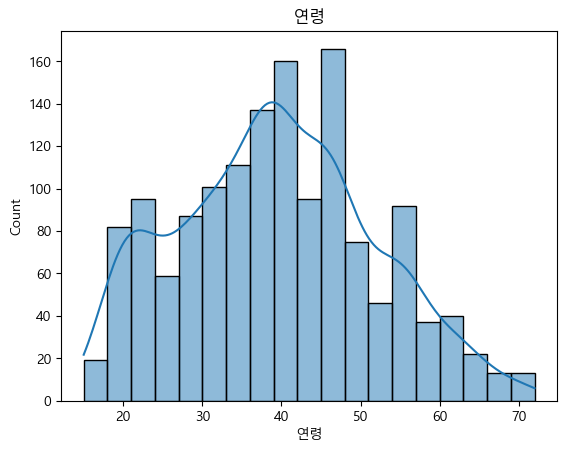

In [52]:
sns.histplot(data=df_ROS_forpatient_dropna_condition, x='연령', kde=True)
plt.title("연령")
plt.show()

In [53]:
Q2 = df_ROS_forpatient_dropna['연령'].median()
Q2

39.0

In [54]:
# option

In [55]:
df_count = (df_ROS_forpatient_dropna['연령'] >= Q2) & (df_ROS_forpatient_dropna['연령'] <= Q3)
df_count.value_counts()

False    1058
True      421
Name: 연령, dtype: int64

In [56]:
df_count.sum()

421

## quest 5
- apply() 이용
- 대상 컬럼 : 연령(중앙값) 차이
- 중앙값 - 개인 연령 = cell 작성

In [57]:
df_ROS_forpatient_dropna['연령'].median() # 연령 중앙값

39.0

In [58]:
def median_sub(cell_values):
    result = 39 - cell_values
    return result

In [59]:
df_ROS_forpatient_dropna[['연령']].apply(median_sub)

,연령
0,-27
1,-8
2,0
3,-1
4,-3
...,...
1889,-20
1890,-3
1891,-22
1892,10


In [60]:
df_ROS_forpatient_dropna_copy = df_ROS_forpatient_dropna.copy()
df_ROS_forpatient_dropna_copy['연령(중앙값) 차이'] = df_ROS_forpatient_dropna_copy['연령'].apply(median_sub)

In [62]:
df_ROS_forpatient_dropna_copy

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,연령(중앙값) 차이
0,2,163,0,60.3,0,66,자영업,RH+A,-27
1,1,171,0,71.7,0,47,운동선수,RH+A,-8
2,1,178,0,77.1,0,39,특수전문직,RH+B,0
3,1,174,0,74.2,0,40,주부,RH+O,-1
4,1,183,0,80.7,0,42,특수전문직,RH+A,-3
...,...,...,...,...,...,...,...,...,...
1889,2,157,0,64.0,0,59,무직,RH+A,-20
1890,2,157,0,59.0,0,42,사무직,RH+B,-3
1891,1,167,0,70.0,0,61,무직,RH+O,-22
1892,1,177,0,77.0,0,29,사무직,RH+A,10


## quest6
- x='product', y='amount'
- order by : top 7(amount)
- hue='type_of_contract'